## Import csv

In [2]:
import numpy as np
import pandas as pd

train_df = pd.read_csv("preprocessed_train.csv")
test_df = pd.read_csv("preprocessed_test.csv")

train_df.shape
test_df.shape


(1383413, 49)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689889 entries, 0 to 2689888
Data columns (total 49 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   elapsedDays               int64  
 1   isBasicEconomy            int64  
 2   isNonStop                 int64  
 3   baseFare                  float64
 4   seatsRemaining            int64  
 5   destinationAirport_ATL    float64
 6   destinationAirport_BOS    float64
 7   destinationAirport_CLT    float64
 8   destinationAirport_DEN    float64
 9   destinationAirport_DFW    float64
 10  destinationAirport_DTW    float64
 11  destinationAirport_EWR    float64
 12  destinationAirport_IAD    float64
 13  destinationAirport_JFK    float64
 14  destinationAirport_LGA    float64
 15  destinationAirport_MIA    float64
 16  destinationAirport_OAK    float64
 17  destinationAirport_ORD    float64
 18  destinationAirport_PHL    float64
 19  destinationAirport_SFO    float64
 20  travelDuration_minutes  

## Split the dataset

In [5]:
train_df_sorted = train_df.sort_values(by='flightDate_as_int')
test_df_sorted = test_df.sort_values(by='flightDate_as_int')

X_train = train_df_sorted.drop(columns=['baseFare'])
y_train = train_df_sorted['baseFare']

X_test = test_df_sorted.drop(columns=['baseFare'])
y_test = test_df_sorted['baseFare']

# align train and test column
X_test = X_test[X_train.columns]

## DummyRegressor

In [7]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
""" Dummy Regressor with Mean Strategy """
# Initialize the Dummy Regressor with strategy='mean'
dummy_mean = DummyRegressor(strategy="mean")

# Fit to training data
dummy_mean.fit(X_train, y_train)

# Predict on test set
y_pred_mean = dummy_mean.predict(X_test)

""" Dummy Regressor with Median Strategy """
# Initialize the Dummy Regressor with strategy='median'
dummy_median = DummyRegressor(strategy="median")

# Fit to training data
dummy_median.fit(X_train, y_train)

# Predict on test set
y_pred_median = dummy_median.predict(X_test)

In [9]:
''' Dummy Regressor based on isCoach '''
# Split data based on isCoach
X_test_coach = X_test[X_test['isCoach'] == 1]
y_test_coach = y_test[X_test['isCoach'] == 1]

X_test_noncoach = X_test[X_test['isCoach'] == 0]
y_test_noncoach = y_test[X_test['isCoach'] == 0]

# Same split for training
X_train_coach = X_train[X_train['isCoach'] == 1]
y_train_coach = y_train[X_train['isCoach'] == 1]

X_train_noncoach = X_train[X_train['isCoach'] == 0]
y_train_noncoach = y_train[X_train['isCoach'] == 0]

# Create and fit dummy regressors
dummy_coach = DummyRegressor(strategy="mean")
dummy_noncoach = DummyRegressor(strategy="mean")

dummy_coach.fit(X_train_coach, y_train_coach)
dummy_noncoach.fit(X_train_noncoach, y_train_noncoach)

# Predictions
y_pred_coach = dummy_coach.predict(X_test_coach)
y_pred_noncoach = dummy_noncoach.predict(X_test_noncoach)

# Combine results
y_test_combined = np.concatenate([y_test_coach, y_test_noncoach])
y_pred_combined = np.concatenate([y_pred_coach, y_pred_noncoach])


In [ ]:
# ''' Dummy Regressor based on isCoach '''
# # Split data based on isCoach
# X_test_coach = X_test[X_test['isCoach'] == 1]
# y_test_coach = y_test[X_test['isCoach'] == 1]

# X_test_noncoach = X_test[X_test['isCoach'] == 0]
# y_test_noncoach = y_test[X_test['isCoach'] == 0]

# # Same split for training
# X_train_coach = X_train[X_train['isCoach'] == 1]
# y_train_coach = y_train[X_train['isCoach'] == 1]

# X_train_noncoach = X_train[X_train['isCoach'] == 0]
# y_train_noncoach = y_train[X_train['isCoach'] == 0]

# # Create and fit dummy regressors
# dummy_coach = DummyRegressor(strategy="mean")
# dummy_noncoach = DummyRegressor(strategy="mean")

# dummy_coach.fit(X_train_coach, y_train_coach)
# dummy_noncoach.fit(X_train_noncoach, y_train_noncoach)

# # Predictions
# y_pred_coach = dummy_coach.predict(X_test_coach)
# y_pred_noncoach = dummy_noncoach.predict(X_test_noncoach)

# # Combine results
# y_test_combined = np.concatenate([y_test_coach, y_test_noncoach])
# y_pred_combined = np.concatenate([y_pred_coach, y_pred_noncoach])

# # Create and fit dummy regressors
# dummy_coach_med = DummyRegressor(strategy="median")
# dummy_noncoach_med = DummyRegressor(strategy="median")

# dummy_coach_med.fit(X_train_coach, y_train_coach)
# dummy_noncoach_med.fit(X_train_noncoach, y_train_noncoach)

# # Predictions
# y_pred_coach_med = dummy_coach_med.predict(X_test_coach)
# y_pred_noncoach_med = dummy_noncoach_med.predict(X_test_noncoach)

# # Combine results
# y_test_combined_med = np.concatenate([y_test_coach, y_test_noncoach])
# y_pred_combined_med = np.concatenate([y_pred_coach, y_pred_noncoach_med])


### Evaluation and Plots

In [11]:
# Evaluate
mae_mean = mean_absolute_error(y_test, y_pred_mean)
rmse_mean = np.sqrt(mean_squared_error(y_test, y_pred_mean))
r2_mean = r2_score(y_test, y_pred_mean)

mae_median = mean_absolute_error(y_test, y_pred_median)
rmse_median = np.sqrt(mean_squared_error(y_test, y_pred_median))
r2_median = r2_score(y_test, y_pred_median)

mae_grouped = mean_absolute_error(y_test_combined, y_pred_combined)
rmse_grouped = np.sqrt(mean_squared_error(y_test_combined, y_pred_combined))
r2_grouped = r2_score(y_test_combined, y_pred_combined)

results_df = pd.DataFrame({
    'Strategy': ['Mean', 'Median', 'Grouped Mean (isCoach)'],
    'MAE': [mae_mean, mae_median, mae_grouped],
    'RMSE': [rmse_mean, rmse_median, rmse_grouped],
    'R²': [r2_mean, r2_median, r2_grouped]
})

results_df = results_df.round(2)

results_df

,Strategy,MAE,RMSE,R²
0,Mean,132.28,170.78,-0.33
1,Median,127.73,166.76,-0.26
2,Grouped Mean (isCoach),129.86,165.10,-0.24


In [12]:
# Compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted (mean)': y_pred_mean,
    'Predicted (median)': y_pred_median,
    'Predicted (Grouped Mean)': y_pred_combined
})

comparison_df.head(10)

,Actual,Predicted (mean),Predicted (median),Predicted (Grouped Mean)
0,199.07,420.510841,412.1,416.993731
1,482.79,420.510841,412.1,416.993731
2,492.19,420.510841,412.1,416.993731
3,492.19,420.510841,412.1,416.993731
4,492.19,420.510841,412.1,416.993731
5,492.19,420.510841,412.1,416.993731
6,492.19,420.510841,412.1,416.993731
7,509.76,420.510841,412.1,416.993731
8,513.49,420.510841,412.1,416.993731
9,528.37,420.510841,412.1,416.993731


C:\Users\Mats\AppData\Local\Temp\ipykernel_17620\1816621472.py:27: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Mats\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


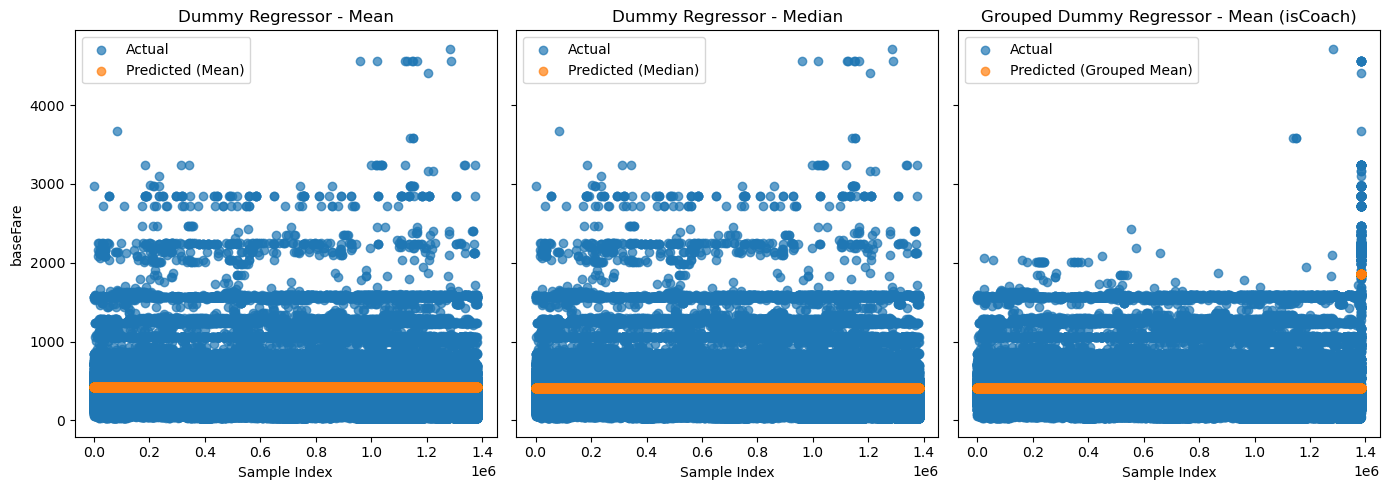

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(14, 5), sharey=True)

# Plot for Dummy Mean
axes[0].scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
axes[0].scatter(range(len(y_pred_mean)), y_pred_mean, label='Predicted (Mean)', alpha=0.7)
axes[0].set_title('Dummy Regressor - Mean')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('baseFare')
axes[0].legend()

# Plot for Dummy Median
axes[1].scatter(range(len(y_test)), y_test, label='Actual', alpha=0.7)
axes[1].scatter(range(len(y_pred_median)), y_pred_median, label='Predicted (Median)', alpha=0.7)
axes[1].set_title('Dummy Regressor - Median')
axes[1].set_xlabel('Sample Index')
axes[1].legend()

# Plot for Grouped Dummy Mean (isCoach)
axes[2].scatter(range(len(y_test_combined)), y_test_combined, label='Actual', alpha=0.7)
axes[2].scatter(range(len(y_pred_combined)), y_pred_combined, label='Predicted (Grouped Mean)', alpha=0.7)
axes[2].set_title('Grouped Dummy Regressor - Mean (isCoach)')
axes[2].set_xlabel('Sample Index')
axes[2].legend()

plt.tight_layout()
plt.show()


## KNN Regression and Hyperparameter Tuning of the Number of Neighbors (k)

- No Feature Selection
- Feature Selection using SelectKBest (filter method)
- _Feature Selection using Sequential Feature Selector (SFS) (heuristic)_ **commented**

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

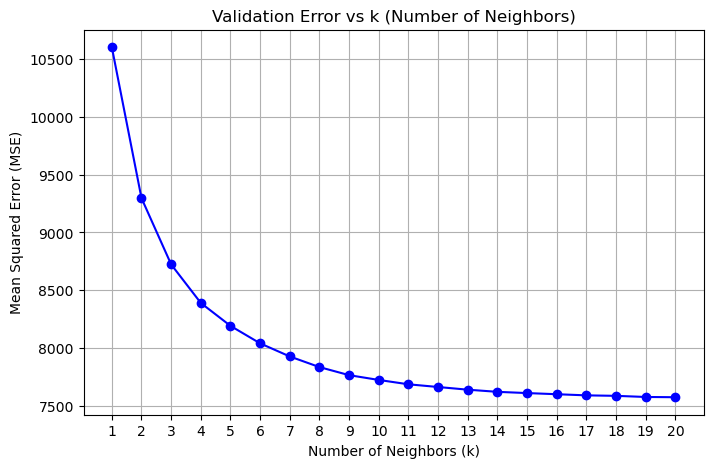

The optimal value for k (number of neighbors) is: 20


In [16]:
''' No Feature Selection'''
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split the training set into sub-training and validation sets (80% for training, 20% for validation)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(
    X_train_scaled, y_train,
    test_size=0.2,  # 20% for validation
    shuffle=False   # Don't shuffle, to respect chronological order
)

# Tune the optimal k using validation set (Find the best k based on MSE)
k_values = range(1, 21)  # Range of k values to try
val_errors = []  # List to store validation errors (MSE)

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_subtrain, y_subtrain)
    y_val_pred = knn.predict(X_val)

    # Calculate Mean Squared Error (MSE) for validation set
    mse = mean_squared_error(y_val, y_val_pred)
    val_errors.append(mse)

# Plot the validation MSE for each k to visualize the learning curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, val_errors, marker='o', linestyle='-', color='b')
plt.title('Validation Error vs k (Number of Neighbors)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Choose the optimal k based on the lowest MSE
best_k = k_values[np.argmin(val_errors)]  # Find the k with the minimum MSE
print(f"The optimal value for k (number of neighbors) is: {best_k}")

# Train the KNN model with the optimal k
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_knn_nosel = knn_best.predict(X_test_scaled)

In [17]:
# ''' Feature Selection using SelectKBest (filter method) '''
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import SelectKBest, f_regression

# # Feature selection: Select top k features based on f_regression
# selector = SelectKBest(f_regression, k=20)
# X_train_selected = selector.fit_transform(X_train, y_train)
# X_test_selected = selector.transform(X_test)

# # Normalize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_selected)
# X_test_scaled = scaler.transform(X_test_selected)

# # Split the training set into sub-training and validation sets (80% for training, 20% for validation)
# X_subtrain, X_val, y_subtrain, y_val = train_test_split(
#     X_train_scaled, y_train,
#     test_size=0.2,  # 20% for validation
#     shuffle=False   # Don't shuffle, to respect chronological order
# )

# # Tune the optimal k using validation set (Find the best k based on MSE)
# k_values = range(1, 21)  # Range of k values to try
# val_errors = []  # List to store validation errors (MSE)

# for k in k_values:
#     knn = KNeighborsRegressor(n_neighbors=k)
#     knn.fit(X_subtrain, y_subtrain)
#     y_val_pred = knn.predict(X_val)

#     # Calculate Mean Squared Error (MSE) for validation set
#     mse = mean_squared_error(y_val, y_val_pred)
#     val_errors.append(mse)

# # Plot the validation MSE for each k to visualize the learning curve
# plt.figure(figsize=(8, 5))
# plt.plot(k_values, val_errors, marker='o', linestyle='-', color='b')
# plt.title('Validation Error vs k (Number of Neighbors)')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

# # Choose the optimal k based on the lowest MSE
# best_k_nosel = k_values[np.argmin(val_errors)]  # Find the k with the minimum MSE
# print(f"The optimal value for k (number of neighbors) is: {best_k_nosel}")

# # Train the KNN model with the optimal k
# knn_best = KNeighborsRegressor(n_neighbors=best_k_nosel)
# knn_best.fit(X_train_scaled, y_train)

# # Predict on the test set
# y_pred_knn_filter = knn_best.predict(X_test_scaled)

In [18]:
# '''Feature Selection using Sequential Feature Selector (SFS) (heuristic)'''
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import SequentialFeatureSelector

# # Normalize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Split the training set into sub-training and validation sets (80% for training, 20% for validation)
# X_subtrain, X_val, y_subtrain, y_val = train_test_split(
#     X_train_scaled, y_train,
#     test_size=0.2,  # 20% for validation
#     shuffle=False   # Don't shuffle, to respect chronological order
# )

# # Use SequentialFeatureSelector without defining k beforehand
# knn = KNeighborsRegressor()  # Do not define k yet

# # Initialize SequentialFeatureSelector for forward selection
# sfs = SequentialFeatureSelector(knn, direction='forward', n_features_to_select='auto', scoring='neg_mean_squared_error')
# sfs.fit(X_subtrain, y_subtrain)

# # Get the selected features
# selected_features = sfs.get_support(indices=True)
# print(f"Selected features: {selected_features}")

# # Now, tune k based on the selected features
# k_values = range(1, 16)  # Range of k values to try
# val_errors = []  # List to store validation errors (MSE)

# for k in k_values:
#     knn = KNeighborsRegressor(n_neighbors=k)
#     knn.fit(X_subtrain[:, selected_features], y_subtrain)  # Use only selected features
#     y_val_pred = knn.predict(X_val[:, selected_features])

#     # Calculate Mean Squared Error (MSE) for validation set
#     mse = mean_squared_error(y_val, y_val_pred)
#     val_errors.append(mse)

# # Plot the validation MSE for each k to visualize the learning curve
# plt.figure(figsize=(8, 5))
# plt.plot(k_values, val_errors, marker='o', linestyle='-', color='b')
# plt.title('Validation Error vs k (Number of Neighbors)')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Mean Squared Error (MSE)')
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

# # Choose the optimal k based on the lowest MSE
# best_k = k_values[np.argmin(val_errors)]  # Find the k with the minimum MSE
# print(f"The optimal value for k (number of neighbors) is: {best_k}")

# # Train the KNN model with the optimal k using the selected features
# knn_best = KNeighborsRegressor(n_neighbors=best_k)
# knn_best.fit(X_train_scaled[:, selected_features], y_train)

# # Predict on the test set using the selected features
# y_pred_knn_heur = knn_best.predict(X_test_scaled[:, selected_features])

### Evaluation and Plots

In [21]:
# Evaluate
mae_knn_nosel = mean_absolute_error(y_test, y_pred_knn_nosel)
rmse_knn_nosel = np.sqrt(mean_squared_error(y_test, y_pred_knn_nosel))
r2_knn_nosel = r2_score(y_test, y_pred_knn_nosel)

# Print results
print(f"KNN Regressor Performance:")
print(f"MAE: {mae_knn_nosel:.2f}")
print(f"RMSE: {rmse_knn_nosel:.2f}")
print(f"R²: {r2_knn_nosel:.2f}")

KNN Regressor Performance:
MAE: 78.91
RMSE: 113.00
R²: 0.42


In [23]:
# Add KNN predictions to the existing comparison DataFrame
comparison_df['Predicted (KNN)'] = y_pred_knn_nosel

# Print first 10 rows of the comparison table
comparison_df[['Actual', 'Predicted (KNN)']].head(10)

,Actual,Predicted (KNN)
0,199.07,237.6720
1,482.79,461.6765
2,492.19,600.1650
3,492.19,572.7795
4,492.19,489.1000
5,492.19,623.9865
6,492.19,609.4625
7,509.76,493.7195
8,513.49,425.5810
9,528.37,499.0695


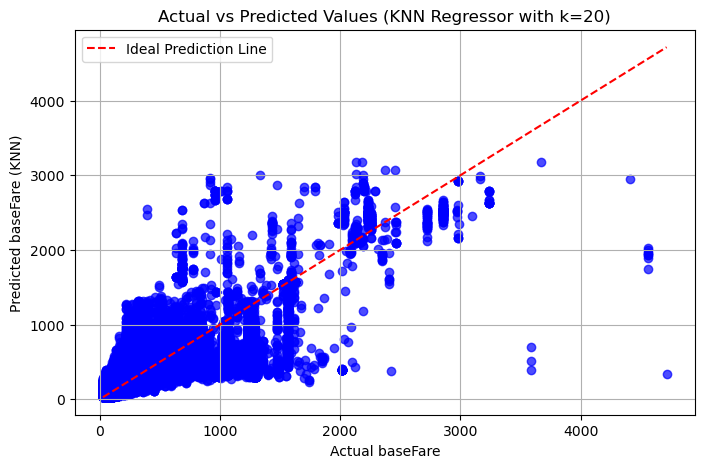

In [25]:
# Plot Actual vs Predicted (KNN)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_knn_nosel, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label="Ideal Prediction Line")
plt.title(f'Actual vs Predicted Values (KNN Regressor with k={best_k})')
plt.xlabel('Actual baseFare')
plt.ylabel('Predicted baseFare (KNN)')
plt.legend()
plt.grid(True)
plt.show()